## <주제> 빼빼로데이 - 가래떡데이

In [1]:
#한글 폰트 설정
from matplotlib import font_manager as fm, rc

font_path='../Data_신나령/Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [2]:
# 모듈 설정, 파일 불러오기
import pandas as pd
#카카오
FILE1='../Data_신나령/datatrend빼빼로.xls'
FILE6='../Data_신나령/2021빼빼로,가래떡.xls'
FILE8='../Data_신나령/datatrend가래떡.xls'
#구글- 검색어
FILE5='../Data_신나령/relatedQueries빼빼로.csv'
FILE7='../Data_신나령/relatedQueries가래떡.csv'

pd.set_option('display.max_rows',410) #길이 설정

df1=pd.read_excel(FILE1)
df5=pd.read_csv(FILE5,sep='\t')
df6=pd.read_excel(FILE6)
df7=pd.read_csv(FILE7,sep='\t')
df8=pd.read_excel(FILE8)

## 1. 2021년 빼빼로, 가래떡 검색량 추이 비교

### (1) 2021년 '빼빼로 & 가래떡' 데이터 전처리

In [3]:
# 데이터 확인
df6.head(10)

,기간,2021-01-01 ~ 2021-12-31,Unnamed: 2
0,기기,전체,NaN
1,성별,전체,NaN
2,연령,전체,NaN
3,지역,전체,NaN
4,NaN,NaN,NaN
5,주제,"통합검색, 검색어 변화량 추이",NaN
6,일,빼빼로,가래떡
7,2021-01-01 00:00:00,1,3
8,2021-01-02 00:00:00,0,2
9,2021-01-03 00:00:00,0,2


In [4]:
# 필요없는 행 삭제
df6.drop([0,1,2,3,4,5],inplace=True)

In [5]:
# 결측치 없애 주고 확인
df6.dropna(inplace=True)
df6.isnull().sum()

기간                         0
2021-01-01 ~ 2021-12-31    0
Unnamed: 2                 0
dtype: int64

In [6]:
# 2021년 전체 데이터에서 날짜 데이터만 뽑아내기 위한 함수
def date2():
    dd2=df6['Unnamed: 2']=='가래떡'
    date2=[]
    for i in range(1,len(dd2)):
        if dd2.iloc[i]==True: break
        else: date2.append(df6.iloc[i])
    dateDF2=pd.DataFrame(date2)
    # 컬럼명 식별 편하게 바꿔 줌
    dateDF2=dateDF2.rename(columns={'기간':'date','2021-01-01 ~ 2021-12-31':'빼빼로','Unnamed: 2':'가래떡'}) 
    dateDF2.set_index('date',inplace=True) # 날짜로 인덱스 설정
    return dateDF2
date2().head()

,빼빼로,가래떡
date,,
2021-01-01,1,3
2021-01-02,0,2
2021-01-03,0,2
2021-01-04,0,2
2021-01-05,1,2


### (2) 2021년 '빼빼로 & 가래떡' 검색량 그래프

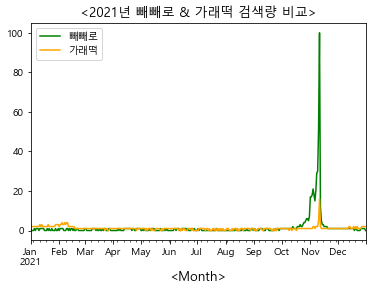

In [7]:
import matplotlib.pyplot as plt
# 2021년 '빼빼로 & 가래떡' 검색량 그래프
plt.rcParams["figure.figsize"]=(15,7)#그래프 사이즈 설정
date2().plot(color=['green','orange'])
plt.title('<2021년 빼빼로 & 가래떡 검색량 비교>',size=13)
plt.xlabel('<Month>',size=13)#X축 이름
plt.show()

### (3) 2021년 11월 '빼빼로 & 가래떡' 검색량 그래프

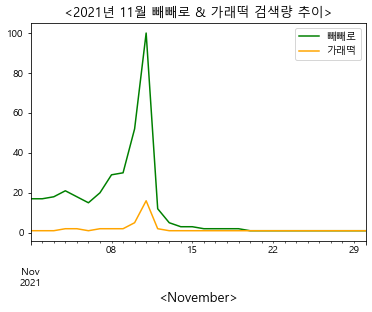

In [8]:
date2()[304:334].plot(color=['green','orange'])
plt.title('<2021년 11월 빼빼로 & 가래떡 검색량 추이>',size=13)
plt.xlabel('<November>',size=13)#X축 이름
plt.show()

#### [중간 분석]

- 11월 11일이 지나면 관심이 급격하게 떨어지는 것을 알 수 있습니다. => 재고 문제점 논의

### (4) 2021년 '빼빼로 & 가래떡' 검색량 성별 그래프

In [9]:
# 원데이터에서 성별 데이터 뽑아낸 후 성별 DF 생성
genderDF=df1[(df1['기간']=='여성')|(df1['기간']=='남성')].rename(columns={'기간':'gender','2021-01-01 ~ 2021-12-31':'빼빼로'})
genderDF.set_index('gender',inplace=True)

In [10]:
# 원데이터에서 성별 데이터 뽑아낸 후 성별 DF 생성
genderDF2=df8[(df8['기간']=='여성')|(df1['기간']=='남성')].rename(columns={'기간':'gender','2021-01-01 ~ 2021-12-31':'가래떡'})
genderDF2.set_index('gender',inplace=True)

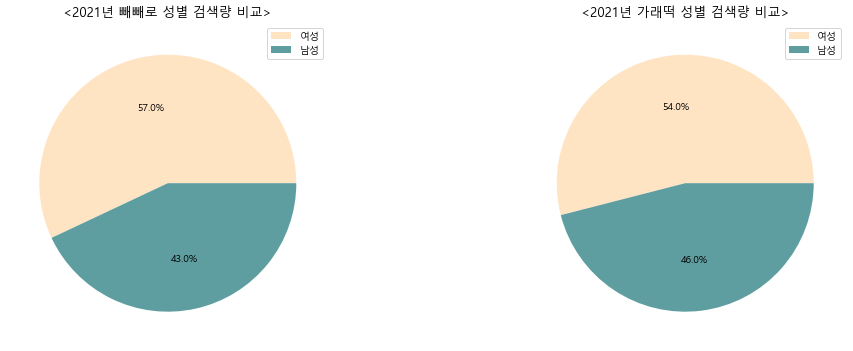

In [11]:
plt.rcParams["figure.figsize"]=(17,13)#그래프 사이즈 설정
fig=plt.figure()
ax1=fig.add_subplot(221)
plt.title('<2021년 빼빼로 성별 검색량 비교>',size=13)
ax1.pie(genderDF['빼빼로'],autopct='%1.1f%%',colors=['bisque','cadetblue'])
plt.legend(labels=genderDF.index) # 범례
ax2=fig.add_subplot(222)
ax2.pie(genderDF2['가래떡'],autopct='%1.1f%%',colors=['bisque','cadetblue'])
plt.title('<2021년 가래떡 성별 검색량 비교>',size=13)
plt.legend(labels=genderDF2.index) # 범례
plt.ylabel('')
plt.show()

### (5) 2021년 '빼빼로 & 가래떡' 검색량 연령대별 그래프

In [12]:
# 연령대별 데이터 DF 생성
df1['기간'].unique()
ageDF=df1[(df1['기간']=='10대')|(df1['기간']=='20대')|(df1['기간']=='30대')|(df1['기간']=='40대')
         |(df1['기간']=='50대')|(df1['기간']=='60대 이상')].rename(columns={'기간':'age','2021-01-01 ~ 2021-12-31':'빼빼로'})
ageDF.set_index('age',inplace=True)

In [13]:
# 연령대별 데이터 DF 생성
df8['기간'].unique()
ageDF2=df8[(df8['기간']=='10대')|(df8['기간']=='20대')|(df8['기간']=='30대')|(df8['기간']=='40대')
         |(df8['기간']=='50대')|(df8['기간']=='60대 이상')].rename(columns={'기간':'age','2021-01-01 ~ 2021-12-31':'가래떡'})
ageDF2.set_index('age',inplace=True)

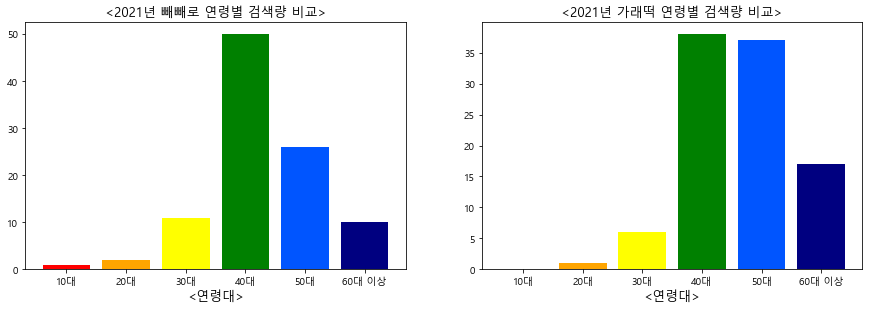

In [14]:
plt.rcParams["figure.figsize"]=(15,10)#그래프 사이즈 설정
fig=plt.figure()
ax1=fig.add_subplot(221)
plt.title('<2021년 빼빼로 연령별 검색량 비교>',size=13)
ax1.bar(ageDF['빼빼로'].index,ageDF['빼빼로'],color=('r','orange','#FFFF00','g','#0055FF','navy'))
plt.xlabel('<연령대>',size=13)
ax2=fig.add_subplot(222)
plt.title('<2021년 가래떡 연령별 검색량 비교>',size=13)
ax2.bar(ageDF2['가래떡'].index,ageDF2['가래떡'],color=('r','orange','#FFFF00','g','#0055FF','navy'))
plt.ylabel('')
plt.xlabel('<연령대>',size=13)
plt.xticks(rotation=0)
plt.show()

### (6) 2021년 '빼빼로 & 가래떡'의 상관계수

In [15]:
date2().corr()

,빼빼로,가래떡
빼빼로,1.000000,0.675007
가래떡,0.675007,1.000000


## 2. 2021년 빼빼로, 가래떡 관련 검색어 비교

### (1) 2021년 '빼빼로' 관련 검색어

In [16]:
# '빼빼로' 관련 검색어 DF 생성
df5.head()

,카테고리: 모든 카테고리
0,"빼빼로: (2021, 대한민국)"
1,TOP
2,"빼빼로 데이,100"
3,"빼빼로 만들기,15"
4,"빼빼로 종류,11"


In [17]:
# 불필요한 행 삭제하고 슬라이싱
df5.drop([0,1],inplace=True)
df5=df5[:25]

In [18]:
df5=df5['카테고리: 모든 카테고리'].str.split(',',expand=True)

In [19]:
df5.rename(columns={0:'관련 검색어',1:'검색량'},inplace=True)

In [20]:
df5.set_index('관련 검색어',inplace=True)

In [21]:
# 검색어 TOP 5
df5.head(5)

,검색량
관련 검색어,
빼빼로 데이,100
빼빼로 만들기,15
빼빼로 종류,11
빼빼로 데이 선물,10
빼빼로 게임,10


### (2) 2021년 '가래떡' 관련 검색어

In [22]:
# '가래떡' 관련 검색어 DF 생성
df7.head()

,카테고리: 모든 카테고리
0,"가래떡: (2021, 대한민국)"
1,TOP
2,"가래떡 떡볶이,100"
3,"가래떡 칼로리,71"
4,"가래떡 에어 프라이어,66"


In [23]:
# 불필요한 행 삭제하고 슬라이싱
df7.drop([0,1],inplace=True)
df7=df7[:25]

In [24]:
df7=df7['카테고리: 모든 카테고리'].str.split(',',expand=True)

In [25]:
df7.rename(columns={0:'관련 검색어',1:'검색량'},inplace=True)

In [26]:
df7.set_index('관련 검색어',inplace=True)

In [27]:
# 관련 검색어
df7.head(7)

,검색량
관련 검색어,
가래떡 떡볶이,100
가래떡 칼로리,71
가래떡 에어 프라이어,66
가래떡 데이,52
가래떡 만들기,48
가래떡 구이,31
가래떡 요리,22


## 3.
### [결론 도출]

- 빼빼로데이에서 농업인의 날을 살리고 쌀 소비를 촉진하기 위해 11월 11일을 가래떡데이로 지정했지만, 데이터들을 보면 알 수 있듯 인지는 하고 있지만 미미한 것을 볼 수 있었습니다.
- 가래떡 관련 검색어는 음식에 초점이 가 있고, 최근 K-디저트가 유행하고 있기 때문에 가래떡으로 만든 디저트나 레시피 등으로 마케팅을 펼친다면 가래떡데이를 좀 더 대중적으로 널리 알릴 수 있지 않을까 하는 생각을 했습니다.